In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
with open('./data/lab1/kroA100.txt') as f:
    data = f.read()
data = data.split('\n')
data = pd.DataFrame([i.split(' ') for i in data])
data = data.drop(0, axis=1)
data = data.drop(100, axis=0)

print(data.head())

      1     2
0  3140  1401
1   556  1056
2  3675  1522
3  1182  1853
4  3595   111


In [100]:
def distance(a, b):
    return round(np.sqrt(( a[0] - b[0])**2 + (a[1]) - b[1])**2)

points_matrix = data.to_numpy()
matrix = []
for i in range(100):
    matrix.append([])
    for j in range(100):
        matrix[i].append(points_matrix[i,:].astype(int) - points_matrix[j,:].astype(int))
matrix = np.array(matrix)

distance_matrix = np.sqrt(np.square(matrix[:,:,0]) + np.square(matrix[:,:,1]))
distance_matrix.shape

for i in range(distance_matrix.shape[0]):
    distance_matrix[i,i] = np.inf


1673.2555094784539


Agorytm zachłanny

In [109]:
remaining = [i for i in range(100)]
x = np.random.choice(remaining)
first_cycle = [x]
remaining.remove(x)
x = np.random.choice(remaining)
second_cycle = [x]
remaining.remove(x)

cycles = [first_cycle, second_cycle]

In [111]:
def distance(cycle, node):
    return matrix[cycle[-1]][node] + matrix[node][cycle[0]]

def calc_distance_sum(cycle, distance_matrix):
    suma = 0
    for i in range(1,len(cycle)):
        suma += distance_matrix[cycle[i-1], cycle[i]]
    return suma

while remaining:
    for cycle in cycles:
        previous = cycle[-1]
        min_dist = distance_matrix[previous][remaining[0]]
        min_node = remaining[0]
        for node in remaining:
            if distance_matrix[node, previous] < min_dist:
                min_dist = distance_matrix[node,previous]
                min_node = node

        cycle.append(min_node)
        remaining.remove(min_node)


print(calc_distance_sum(cycles[0], distance_matrix))
                     

    
        
            

15386.902575842169


array([[3438.37185307, 3438.37185307, 3438.37185307, ..., 3438.37185307,
        3438.37185307, 3438.37185307],
       [1193.42867403, 1193.42867403, 1193.42867403, ..., 1193.42867403,
        1193.42867403, 1193.42867403],
       [3977.70147196, 3977.70147196, 3977.70147196, ..., 3977.70147196,
        3977.70147196, 3977.70147196],
       ...,
       [3514.34730782, 3514.34730782, 3514.34730782, ..., 3514.34730782,
        3514.34730782, 3514.34730782],
       [3991.85282795, 3991.85282795, 3991.85282795, ..., 3991.85282795,
        3991.85282795, 3991.85282795],
       [3063.92313872, 3063.92313872, 3063.92313872, ..., 3063.92313872,
        3063.92313872, 3063.92313872]])

AttributeError: module 'matplotlib.pyplot' has no attribute 'line'

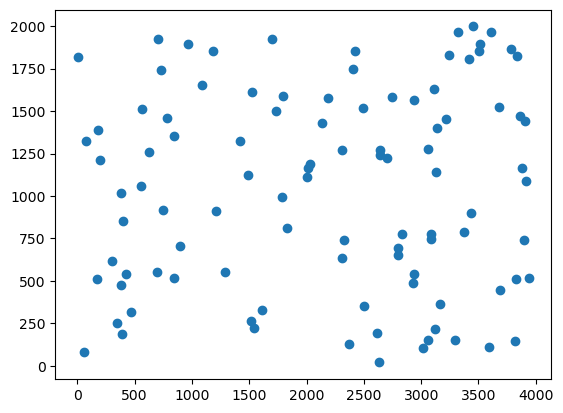

In [94]:
points_matrix = points_matrix.astype(int)
def plot_results(cycle1, cycle2):
    plt.scatter(points_matrix[..., 0], points_matrix[..., 1])
    plt.line(points_matrix[cycle1, 0], points_matrix[cycle1, 1])
    # plot 
    plt.show()
print(first_cycle, second_cycle)
plot_results(first_cycle, second_cycle)

In [88]:
first_cycle.append(42)
second_cycle.append(12)

In [86]:
points_matrix.shape

(100, 2)